In [1]:
import pandas as pd
import string
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
dokumen_skripsi = pd.read_csv('skripsi_fasilkom.csv')
# Cleaning
dokumen_skripsi = dokumen_skripsi.dropna()
dokumen_skripsi = dokumen_skripsi.drop_duplicates()
def preprocessing(abstrak):
    word = []
    for text in abstrak:
        lowercase = text.lower()
        hapus_angka = re.sub(r"\d+", "", lowercase)
        hapus_whitespace = re.sub("\s+", " ", hapus_angka)
        hapus_simbol = hapus_whitespace.translate(str.maketrans("", "", string.punctuation))
        dokumen_bersih = hapus_simbol   
        # Filtering
        factory_stopword = StopWordRemoverFactory()
        stopword = factory_stopword.create_stop_word_remover()
        kata_penting = stopword.remove(dokumen_bersih)
        # Stemming
        factory_stemming = StemmerFactory()
        stemmer = factory_stemming.create_stemmer()
        kata_dasar = stemmer.stem(kata_penting)
        # Tokenization
        token_kata = word_tokenize(kata_dasar)
        word.append(token_kata)
    return word
abstrak = dokumen_skripsi['Abstract']
dokumen_skripsi['Kumpulan Kata'] = preprocessing(abstrak)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [2]:
dokumen_skripsi

,Judul,Tahun,Abstract,Kumpulan Kata
0,Sistem Informasi Spesifikasi Kualitas Jamur Ti...,2020,Jamur tiram dengan nama latin Pleurotus ostrea...,"[jamur, tiram, nama, latin, pleurotus, ostreat..."
1,Pemodelan Perusahaan Menggunakan Metode For E...,2020,Perkembangan teknologi informasi dan komunikas...,"[kembang, teknologi, informasi, komunikasi, bu..."
2,Penentuan Prioritas Pengembangan Investasi TI ...,2020,Kementerian industri Indonesia telah merancang...,"[menteri, industri, indonesia, rancang, bebera..."
3,Perancangan User Interface Untuk Aplikasi Pemb...,2020,Disleksia merupakan kesulitan belajar membaca ...,"[disleksia, rupa, sulit, ajar, baca, tidak, hu..."
4,Penerapan Metode Antropometri Untuk Menentukan...,2020,Posyandu merupakan salah satu bentuk Upaya Kes...,"[posyandu, rupa, salah, satu, bentuk, upaya, s..."
...,...,...,...,...
485,DESAIN DAN IMPLEMENTASI MEDIA INTERAKTIF LAGU ...,2014,Indonesian cultural values are now starting to...,"[indonesian, cultural, values, are, now, start..."
486,PENGGUNAAN TIMESTAMP LINKING SCHEME DENGAN MES...,2014,Penelitian ini membahas tentang manajemen peng...,"[teliti, bahas, manajemen, kelola, naskah, sis..."
487,PERANCANGAN SISTEM INFORMASI STOK MATERIAL DAN...,2014,Penelitian ini bertujuan untuk mengetahui wakt...,"[teliti, tuju, tahu, waktu, material, harus, p..."
488,PENGEMBANGAN MEDIA PEMBELAJARAN BERBASIS WEB D...,2014,Dunia pendidikan terus bergerak secara dinamis...,"[dunia, didik, terus, gerak, dinamis, khusus, ..."


In [3]:
import pandas as pd
from math import log10

# List kata
def get_list_of_word(list_of_document):
    list_of_word = []
    for sentence in list_of_document:
        for word in sentence:
            if word not in list_of_word:
                list_of_word.append(word)
    return list_of_word

length_of_document = len(dokumen_skripsi['Kumpulan Kata'])
list_of_word = get_list_of_word(dokumen_skripsi['Kumpulan Kata'])

# Term frequency (TF)
def create_term_frequency(list_of_word, length_of_document):
    term_frequency = [] 
    for _ in range(length_of_document):
        term_frequency.append(dict(zip(list_of_word, [0 for _ in range(len(list_of_word))])))
    return term_frequency

tf = create_term_frequency(list_of_word, length_of_document)

# Inverse Document Frequency (IDF)
def create_document_frequency(list_of_word):
    return dict(zip(list_of_word, [0 for _ in range(len(list_of_word))]))

for index, sentence in enumerate(dokumen_skripsi['Kumpulan Kata']):
    for word in sentence:
        if word in tf[index]:
            tf[index][word] += 1

document_frequency = create_document_frequency(list_of_word)

for index, sentence in enumerate(tf):
    for key, value in sentence.items():
        if value:
            document_frequency[key] += 1

def get_d_df(length_of_document, document_frequency):
    d_df = {}
    for key, value in document_frequency.items():
        d_df[key] = length_of_document / value
    return d_df

d_df = get_d_df(length_of_document, document_frequency)

def get_idf(d_df):
    idf = {}
    for key, value in d_df.items():
        idf[key] = round(log10(value), 3)
    return idf

idf = get_idf(d_df)

# Term frequency-Inverse Document Frequency (TF-IDF)
def get_tfidf(tf, idf):
    w_q_t = []
    for index, document in enumerate(tf):
        w_q_t.append({})
        for key, value in document.items():
            w_q_t[index][key] = value * idf[key]
    return w_q_t

tfidf = get_tfidf(tf, idf)
bobot = pd.DataFrame(tfidf)

In [4]:
bobot

,jamur,tiram,nama,latin,pleurotus,ostreatus,salah,satu,beberapa,jenis,...,message,hash,redaksi,arang,indie,jingga,limit,tip,medik,simanik
0,35.838,43.04,1.389,2.69,2.69,2.69,0.274,0.786,3.0,0.787,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.000,0.00,0.000,0.00,0.00,0.00,0.822,0.786,0.0,0.787,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,1.2,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.000,0.00,0.000,0.00,0.00,0.00,0.548,0.524,0.6,1.574,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.000,0.00,0.000,0.00,0.00,0.00,0.274,0.262,0.0,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,0.0,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
486,0.000,0.00,0.000,0.00,0.00,0.00,0.548,0.524,0.6,0.000,...,5.38,5.38,2.69,2.69,2.69,2.69,0.00,0.00,0.00,0.00
487,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,0.0,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,5.38,2.69,0.00,0.00
488,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,0.6,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [5]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(bobot)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(std_data)

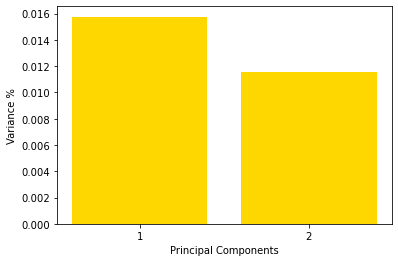

In [33]:
import matplotlib.pyplot as plt
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

In [34]:
PCA_components

,0,1
0,-0.809521,-1.839471
1,-0.755551,-0.623420
2,-0.609850,-0.778350
3,-1.787835,-3.770250
4,-0.266335,-0.978261
...,...,...
485,201.289365,-51.961952
486,-0.692170,-0.571586
487,-0.160205,0.288073
488,0.487133,0.078814


In [9]:
PCA_components.to_excel('PCA-PraOutliers.xlsx')

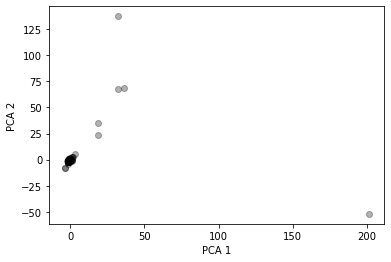

In [35]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [36]:
Q1 = PCA_components.quantile(0.25)
Q3 = PCA_components.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0    0.409193
1    0.569716
dtype: float64


In [37]:
PCA_components = PCA_components[~((PCA_components < (Q1 - 1.5 * IQR)) | (PCA_components > (Q3 + 1.5 * IQR)))]
PCA_components

,0,1
0,-0.809521,NaN
1,-0.755551,-0.623420
2,-0.609850,-0.778350
3,NaN,NaN
4,-0.266335,-0.978261
...,...,...
485,NaN,NaN
486,-0.692170,-0.571586
487,-0.160205,0.288073
488,NaN,0.078814


In [38]:
PCA_components = PCA_components.dropna(axis=0)

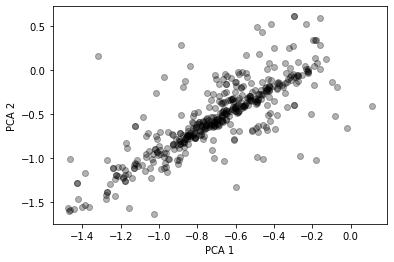

In [39]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [15]:
PCA_components.to_excel('PCA-PascaOutliers.xlsx')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
PCA_components = pd.read_excel('PCA-PascaOutliers.xlsx')
PCA_components = PCA_components[[0,1]]

In [72]:
PCA_components_pra = pd.read_excel('PCA-PraOutliers.xlsx')

In [7]:
PCA_components

,0,1
0,-0.756375,-0.575118
1,-0.612350,-0.747345
2,-0.271091,-0.940968
3,-0.856843,-1.496871
4,-0.440789,-0.238722
...,...,...
442,-0.603620,-0.161746
443,-0.191863,-0.162367
444,-0.691195,-0.552438
445,-0.158765,0.277221


In [16]:
import numpy as np
import random
class KMean:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    def fit_predict(self, X):
        random_index = random.sample(range(0,X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]
        for i in range(self.max_iter):
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X, cluster_group)
            if (old_centroids == self.centroids).all():
                break
        return cluster_group
    def assign_clusters(self, X):
        cluster_group = []
        similarity = []
        for row in X:
            for centroid in self.centroids:
                similarity.append((np.dot(row,centroid))/((np.sqrt(np.dot(row,row)))*(np.sqrt(np.dot(centroid,centroid)))))
            max_similarity = max(similarity)
            index_pos = similarity.index(max_similarity)
            cluster_group.append(index_pos)
            similarity.clear()
        return np.array(cluster_group)
    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))
        return np.array(new_centroids)

In [18]:
from sklearn.metrics import silhouette_score
for n in range(2,11):
    km = KMean(n_clusters=n, max_iter=500)
    y_means = km.fit_predict(PCA_components.iloc[:,:].values)
    score = silhouette_score(PCA_components.iloc[:,:].values, y_means, metric='cosine')
    print('Cluster: {}'.format(n))
    print('Silhouette Score: {}'.format(score))

Cluster: 2
Silhouette Score: 0.81857570726257
Cluster: 3
Silhouette Score: 0.7417767705410228
Cluster: 4
Silhouette Score: 0.6288436364946974
Cluster: 5
Silhouette Score: 0.6855081020380019
Cluster: 6
Silhouette Score: 0.6703775561524259
Cluster: 7
Silhouette Score: 0.6409041967592662
Cluster: 8
Silhouette Score: 0.6452074454474165
Cluster: 9
Silhouette Score: 0.6851206444127916
Cluster: 10
Silhouette Score: 0.6836270567058575


In [19]:
from sklearn.metrics import silhouette_score
for n in range(2,11):
    km = KMean(n_clusters=n, max_iter=500)
    y_means = km.fit_predict(PCA_components.iloc[:,:].values)
    score = silhouette_score(PCA_components.iloc[:,:].values, y_means, metric='cosine')
    print('Cluster: {}'.format(n))
    print('Silhouette Score: {}'.format(score))

Cluster: 2
Silhouette Score: 0.7975547372053398
Cluster: 3
Silhouette Score: 0.7417767705410228
Cluster: 4
Silhouette Score: 0.7588345358573692
Cluster: 5
Silhouette Score: 0.6807781929701706
Cluster: 6
Silhouette Score: 0.6703775561524259
Cluster: 7
Silhouette Score: 0.6409041967592662
Cluster: 8
Silhouette Score: 0.6576988866830493
Cluster: 9
Silhouette Score: 0.6530670233198297
Cluster: 10
Silhouette Score: 0.6454320223005103


In [20]:
from sklearn.metrics import silhouette_score
for n in range(2,11):
    km = KMean(n_clusters=n, max_iter=500)
    y_means = km.fit_predict(PCA_components.iloc[:,:].values)
    score = silhouette_score(PCA_components.iloc[:,:].values, y_means, metric='cosine')
    print('Cluster: {}'.format(n))
    print('Silhouette Score: {}'.format(score))

Cluster: 2
Silhouette Score: 0.7975547372053398
Cluster: 3
Silhouette Score: 0.7417767705410228
Cluster: 4
Silhouette Score: 0.7161725257697091
Cluster: 5
Silhouette Score: 0.6477082242527575
Cluster: 6
Silhouette Score: 0.6671763544474465
Cluster: 7
Silhouette Score: 0.6538689785575246
Cluster: 8
Silhouette Score: 0.648827828214657
Cluster: 9
Silhouette Score: 0.6524652567855804
Cluster: 10
Silhouette Score: 0.6412193218770409


In [21]:
from sklearn.metrics import silhouette_score
for n in range(2,11):
    km = KMean(n_clusters=n, max_iter=500)
    y_means = km.fit_predict(PCA_components.iloc[:,:].values)
    score = silhouette_score(PCA_components.iloc[:,:].values, y_means, metric='cosine')
    print('Cluster: {}'.format(n))
    print('Silhouette Score: {}'.format(score))

Cluster: 2
Silhouette Score: 0.81857570726257
Cluster: 3
Silhouette Score: 0.7417767705410228
Cluster: 4
Silhouette Score: 0.7588345358573692
Cluster: 5
Silhouette Score: 0.6855081020380019
Cluster: 6
Silhouette Score: 0.668968128740469
Cluster: 7
Silhouette Score: 0.6409041967592662
Cluster: 8
Silhouette Score: 0.5903244823012801
Cluster: 9
Silhouette Score: 0.6540997715695296
Cluster: 10
Silhouette Score: 0.6538753871420315


In [22]:
from sklearn.metrics import silhouette_score
for n in range(2,11):
    km = KMean(n_clusters=n, max_iter=500)
    y_means = km.fit_predict(PCA_components.iloc[:,:].values)
    score = silhouette_score(PCA_components.iloc[:,:].values, y_means, metric='cosine')
    print('Cluster: {}'.format(n))
    print('Silhouette Score: {}'.format(score))

Cluster: 2
Silhouette Score: 0.7975547372053398
Cluster: 3
Silhouette Score: 0.7490075721349593
Cluster: 4
Silhouette Score: 0.5618699674130047
Cluster: 5
Silhouette Score: 0.6477082242527575
Cluster: 6
Silhouette Score: 0.6703775561524259
Cluster: 7
Silhouette Score: 0.639432912153537
Cluster: 8
Silhouette Score: 0.648827828214657
Cluster: 9
Silhouette Score: 0.6464460923655951
Cluster: 10
Silhouette Score: 0.6454320223005103


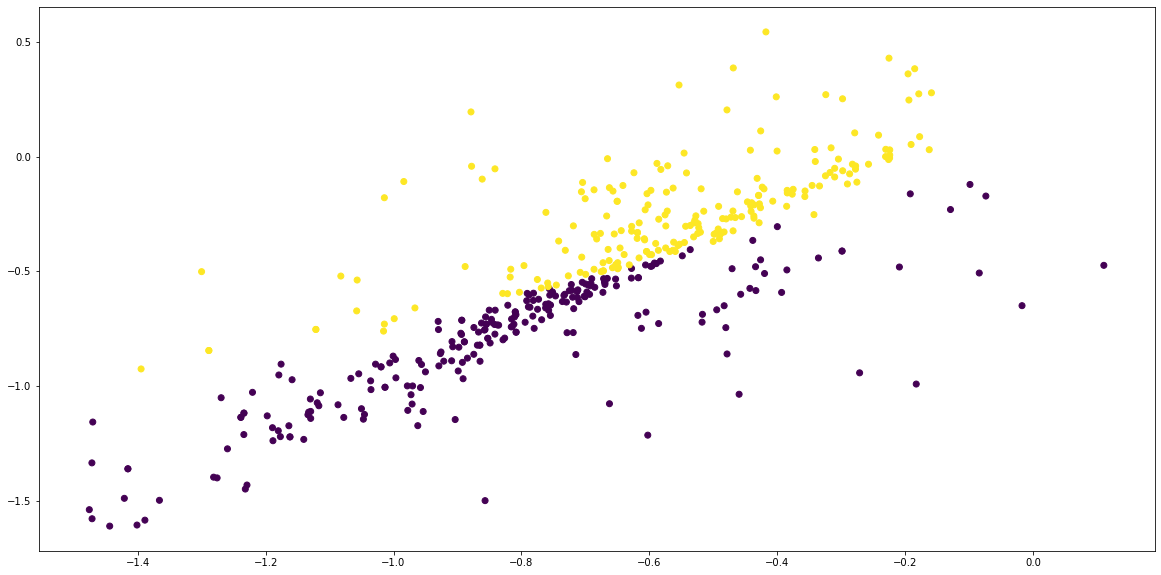

In [56]:
model = KMean(n_clusters=2, max_iter=1)
labels = model.fit_predict(PCA_components.iloc[:,:].values)
plt.figure(figsize=(20,10))
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

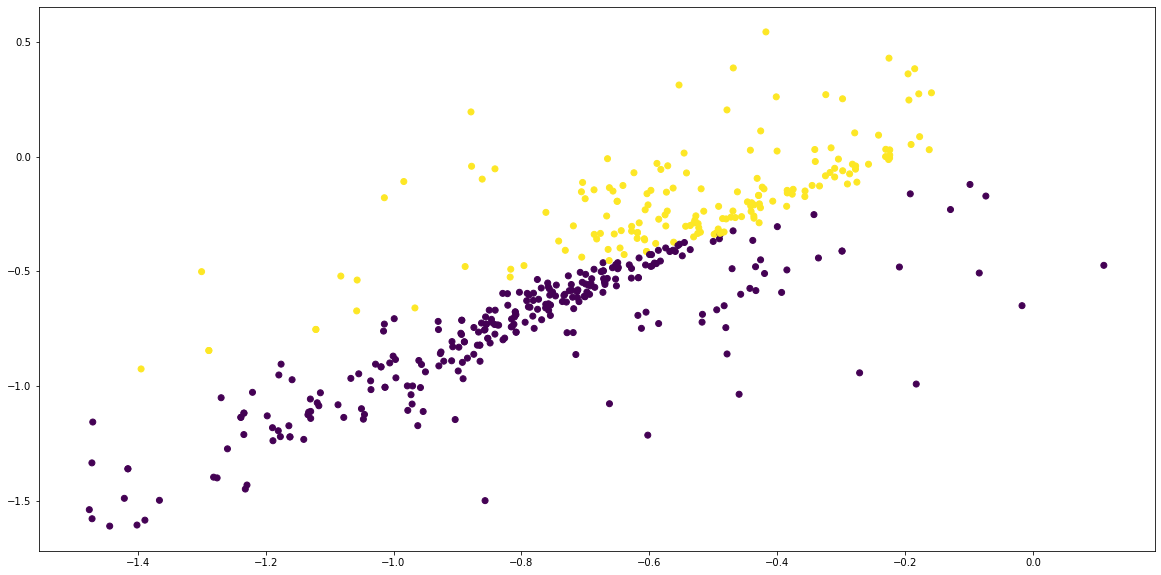

In [58]:
model = KMean(n_clusters=2, max_iter=2)
labels = model.fit_predict(PCA_components.iloc[:,:].values)
plt.figure(figsize=(20,10))
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

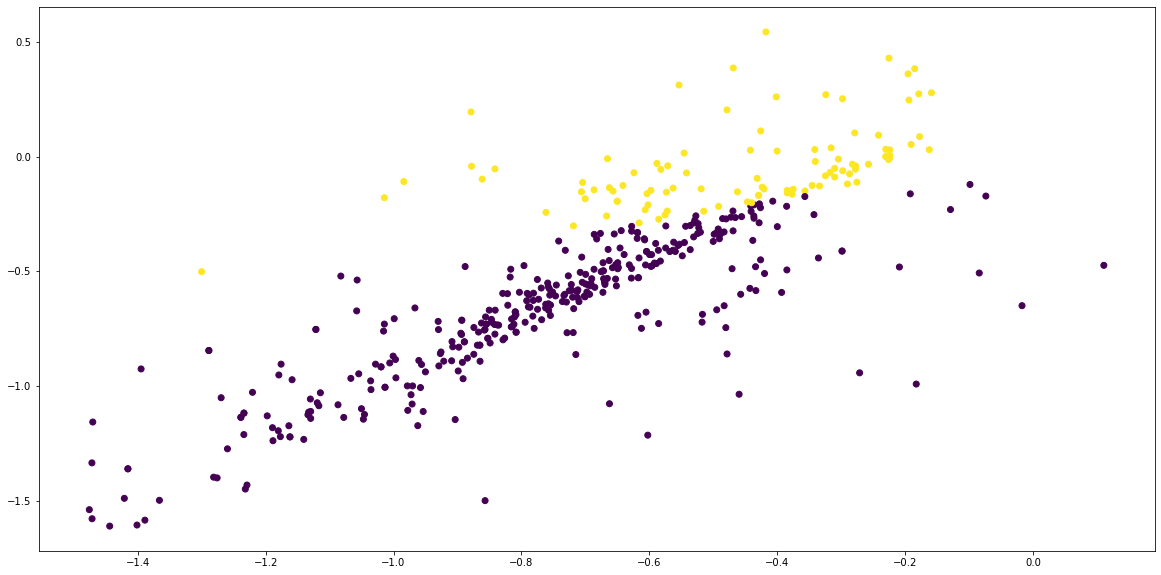

In [60]:
model = KMean(n_clusters=2, max_iter=3)
labels = model.fit_predict(PCA_components.iloc[:,:].values)
plt.figure(figsize=(20,10))
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

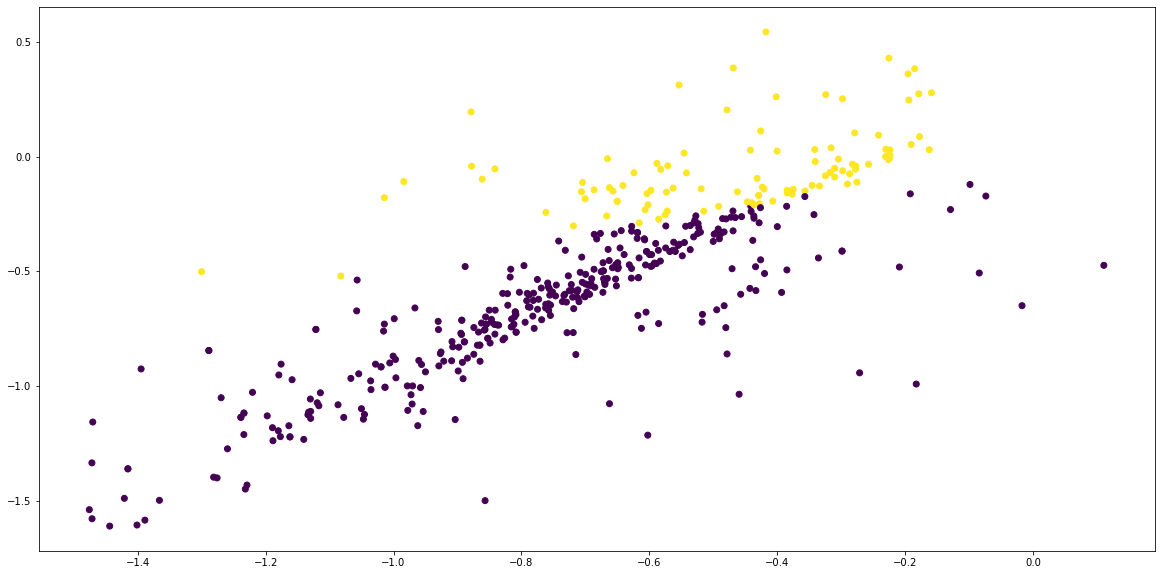

In [61]:
model = KMean(n_clusters=2, max_iter=4)
labels = model.fit_predict(PCA_components.iloc[:,:].values)
plt.figure(figsize=(20,10))
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

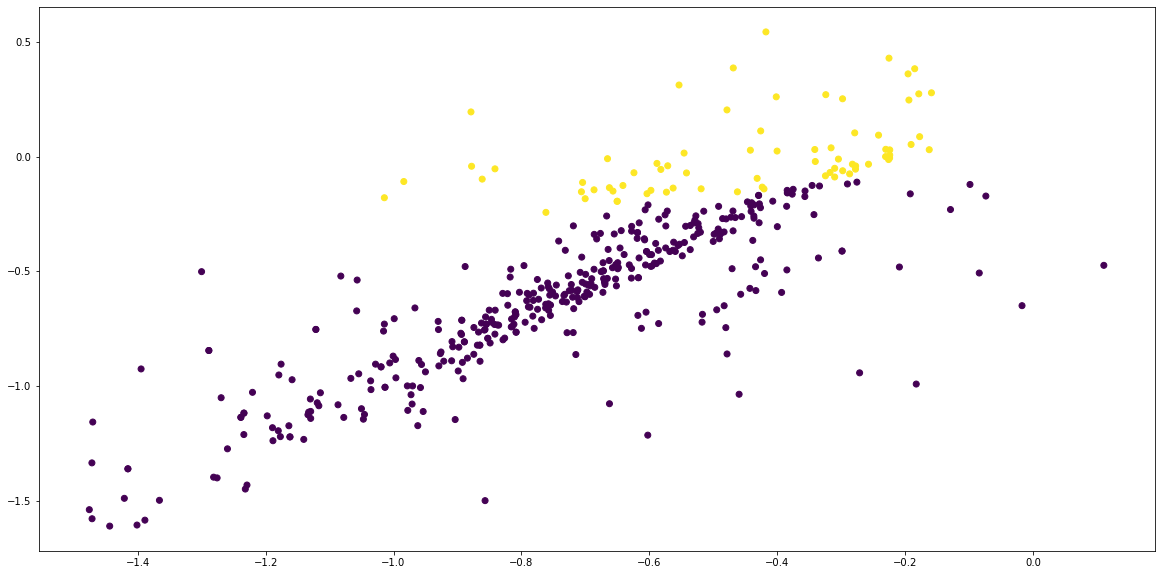

In [62]:
model = KMean(n_clusters=2, max_iter=5)
labels = model.fit_predict(PCA_components.iloc[:,:].values)
plt.figure(figsize=(20,10))
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

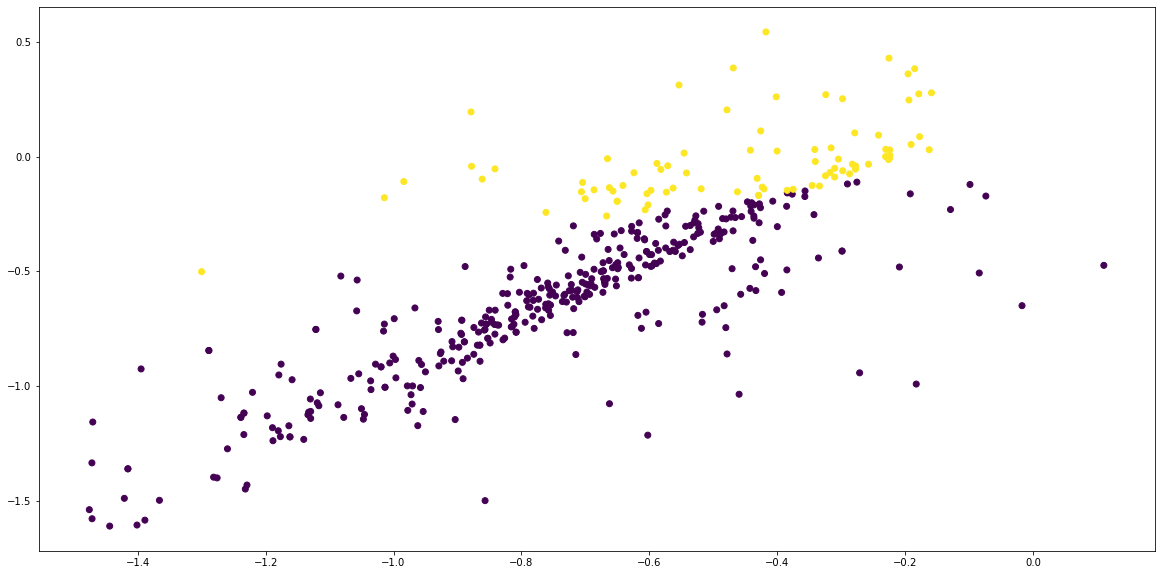

In [55]:
model = KMean(n_clusters=2, max_iter=6)
labels = model.fit_predict(PCA_components.iloc[:,:].values)
plt.figure(figsize=(20,10))
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

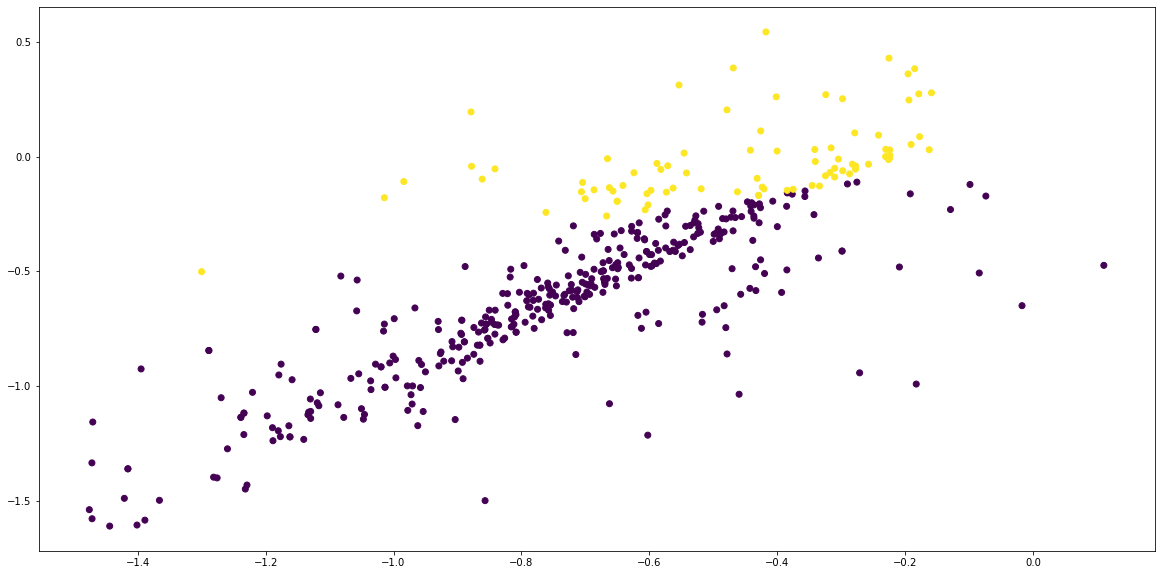

In [54]:
model = KMean(n_clusters=2, max_iter=500)
labels = model.fit_predict(PCA_components.iloc[:,:].values)
plt.figure(figsize=(20,10))
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [63]:
hasil = PCA_components

In [64]:
hasil['Cluster'] = labels

In [65]:
hasil

,0,1,Cluster
0,-0.756375,-0.575118,0
1,-0.612350,-0.747345,0
2,-0.271091,-0.940968,0
3,-0.856843,-1.496871,0
4,-0.440789,-0.238722,0
...,...,...,...
442,-0.603620,-0.161746,1
443,-0.191863,-0.162367,0
444,-0.691195,-0.552438,0
445,-0.158765,0.277221,1


In [66]:
hasil.groupby('Cluster').count()

,0,1
Cluster,,
0,374,374
1,73,73


In [67]:
hasil['Index'] = hasil.index

In [70]:
dokumen =pd.read_csv('skripsi_fasilkom.csv')
skripsi = dokumen
skripsi['Index'] = skripsi.index

In [72]:
data = skripsi.join(hasil, on='Index', how='left', lsuffix='_left', rsuffix='_right')
data = data.dropna(axis=0)
data = data.drop(columns=['Index_left', 'Index_right',0,1])
data = data.reset_index(drop=True)
data['Cluster'] = data['Cluster'].astype(int)
data

,Judul,Tahun,Abstract,Cluster
0,Sistem Informasi Spesifikasi Kualitas Jamur Ti...,2020,Jamur tiram dengan nama latin Pleurotus ostrea...,0
1,Pemodelan Perusahaan Menggunakan Metode For E...,2020,Perkembangan teknologi informasi dan komunikas...,0
2,Penentuan Prioritas Pengembangan Investasi TI ...,2020,Kementerian industri Indonesia telah merancang...,0
3,Perancangan User Interface Untuk Aplikasi Pemb...,2020,Disleksia merupakan kesulitan belajar membaca ...,0
4,Penerapan Metode Antropometri Untuk Menentukan...,2020,Posyandu merupakan salah satu bentuk Upaya Kes...,0
...,...,...,...,...
442,SISTEM INFORMASI KARTU PEGAWAI ELEKTRONIK (SI-...,2015,Bank Pembangunan Daerah Jawa Timur yang dikena...,1
443,SISTEM INFORMASI PERSEDIAAN STOK MATERIAL PEMA...,2015,Penelitian ini bertujuan untuk mengetahui jum...,0
444,PENJADWALAN PERKULIAHAN DENGAN KASUS TEAM TEAC...,2015,Sering terjadinya kerumitan dalam pembuatan ja...,0
445,SISTEM INFORMASI GEOGRAFIS PEMETAAN SEBARAN S...,2015,Masyarakat merupakan modal dasar pembangunan b...,1


In [73]:
data.to_excel('skripsi_fasilkom_cluster.xlsx', index=False)

In [21]:
for c in range(0,448):
    if data['Cluster'][c]==0:
        data['Cluster'][c]='Pengembangan Sistem Pendukung Keputusan dan Peramalan'
    elif data['Cluster'][c]==1:
        data['Cluster'][c]='Pengembangan Sistem Pendukung Keputusan dan Pengukuran Kinerja TI'

<ipython-input-21-e95416039cd9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters['Cluster'][c]='Pengukuran Kinerja TI, Pengembangan Sistem Pendukung Keputusan, dan Forecasting'
C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-21-e95416039cd9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust

In [76]:
data.groupby(['Cluster','Tahun']).count()

Judul  Abstract
Cluster Tahun                 
0       2015      61        61
        2016      53        53
        2017      77        77
        2018      55        55
        2019      86        86
        2020      42        42
1       2015       7         7
        2016       9         9
        2017      11        11
        2018      10        10
        2019      27        27
        2020       9         9

       Jumlah Dokumen (Y)  X   XY  XX
Tahun                                
2015                   61 -5 -305  25
2016                   53 -3 -159   9
2017                   77 -1  -77   1
2018                   55  1   55   1
2019                   86  3  258   9
2020                   42  5  210  25


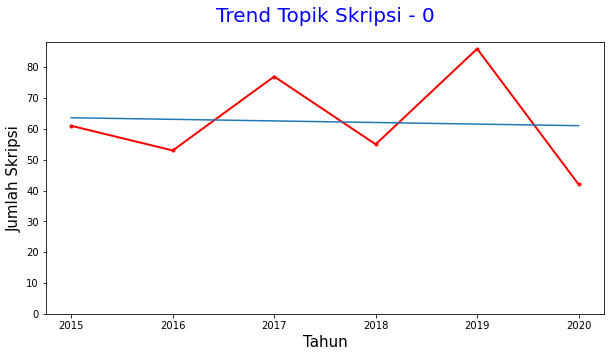

In [88]:
n=0
cluster = clusters[clusters['Cluster']==n]
d = {'Jumlah Dokumen (Y)':cluster.groupby(['Tahun'])['Judul'].count()}
dataset = pd.DataFrame(data=d)
jumlah = len(dataset)
x = [-5,-3,-1,1,3,5]
dataset['X'] = x
dataset['XY'] = np.multiply(dataset['Jumlah Dokumen (Y)'],dataset['X'])
dataset['XX'] = np.square(dataset['X'])
print(dataset)
prediksi = []
for x in dataset['X']:
    y_pred = (np.sum(dataset['Jumlah Dokumen (Y)'])/jumlah)+((np.sum(dataset['XY'])/np.sum(dataset['XX']))*x)
    prediksi.append(y_pred)
plt.figure(figsize=(10,5))
plt.plot(dataset.index, dataset['Jumlah Dokumen (Y)'], color='red', marker='.', linewidth=2)
plt.plot(dataset.index, prediksi)
plt.title('Trend Topik Skripsi - {}'.format(n), loc='center', pad=20, color='blue', fontsize=20)
plt.xlabel('Tahun', fontsize=15)
plt.ylabel('Jumlah Skripsi', fontsize=15)
plt.ylim(ymin=0)
# plt.savefig('Trend Topik {}.png'.format(n))
plt.show()

       Jumlah Dokumen (Y)  X  XY  XX
Tahun                               
2015                    7 -5 -35  25
2016                    9 -3 -27   9
2017                   11 -1 -11   1
2018                   10  1  10   1
2019                   27  3  81   9
2020                    9  5  45  25


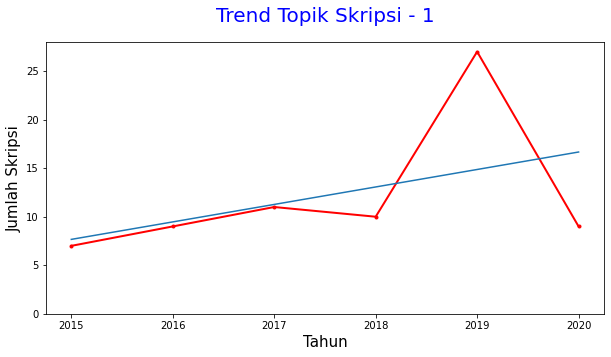

In [90]:
n=1
cluster = clusters[clusters['Cluster']==n]
d = {'Jumlah Dokumen (Y)':cluster.groupby(['Tahun'])['Judul'].count()}
dataset = pd.DataFrame(data=d)
jumlah = len(dataset)
x = [-5,-3,-1,1,3,5]
dataset['X'] = x
dataset['XY'] = np.multiply(dataset['Jumlah Dokumen (Y)'],dataset['X'])
dataset['XX'] = np.square(dataset['X'])
print(dataset)
prediksi = []
for x in dataset['X']:
    y_pred = (np.sum(dataset['Jumlah Dokumen (Y)'])/jumlah)+((np.sum(dataset['XY'])/np.sum(dataset['XX']))*x)
    prediksi.append(y_pred)
plt.figure(figsize=(10,5))
plt.plot(dataset.index, dataset['Jumlah Dokumen (Y)'], color='red', marker='.', linewidth=2)
plt.plot(dataset.index, prediksi)
plt.title('Trend Topik Skripsi - {}'.format(n), loc='center', pad=20, color='blue', fontsize=20)
plt.xlabel('Tahun', fontsize=15)
plt.ylabel('Jumlah Skripsi', fontsize=15)
plt.ylim(ymin=0)
# plt.savefig('Trend Topik {}.png'.format(n))
plt.show()

In [83]:
import pandas as pd
import string
import re
# import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
dokumen = pd.read_excel('skripsi_fasilkom_cluster.xlsx')
# Cleaning
dokumen = dokumen.dropna()
dokumen = dokumen.drop_duplicates()
def preprocessing(abstrak):
    word = []
    for text in abstrak:
        lowercase = text.lower()
        hapus_angka = re.sub(r"\d+", "", lowercase)
        hapus_whitespace = re.sub("\s+", " ", hapus_angka)
        hapus_simbol = hapus_whitespace.translate(str.maketrans("", "", string.punctuation))
        dokumen_bersih = hapus_simbol   
        # Filtering
        factory_stopword = StopWordRemoverFactory()
        stopword = factory_stopword.create_stop_word_remover()
        kata_penting = stopword.remove(dokumen_bersih)
        # Tokenization
        token_kata = word_tokenize(kata_penting)
        word.append(token_kata)
    return word
abstrak = dokumen['Abstract']
dokumen['Kumpulan Kata'] = preprocessing(abstrak)

In [84]:
dokumen

,Judul,Tahun,Abstract,Cluster,Kumpulan Kata Abstract,Kumpulan Kata Judul
0,Sistem Informasi Spesifikasi Kualitas Jamur Ti...,2020,Jamur tiram dengan nama latin Pleurotus ostrea...,0,"[jamur, tiram, nama, latin, pleurotus, ostreat...","[sistem, informasi, spesifikasi, kualitas, jam..."
1,Pemodelan Perusahaan Menggunakan Metode For E...,2020,Perkembangan teknologi informasi dan komunikas...,0,"[perkembangan, teknologi, informasi, komunikas...","[pemodelan, perusahaan, menggunakan, metode, f..."
2,Penentuan Prioritas Pengembangan Investasi TI ...,2020,Kementerian industri Indonesia telah merancang...,0,"[kementerian, industri, indonesia, merancang, ...","[penentuan, prioritas, pengembangan, investasi..."
3,Perancangan User Interface Untuk Aplikasi Pemb...,2020,Disleksia merupakan kesulitan belajar membaca ...,0,"[disleksia, merupakan, kesulitan, belajar, mem...","[perancangan, user, interface, aplikasi, pembe..."
4,Penerapan Metode Antropometri Untuk Menentukan...,2020,Posyandu merupakan salah satu bentuk Upaya Kes...,0,"[posyandu, merupakan, salah, satu, bentuk, upa...","[penerapan, metode, antropometri, menentukan, ..."
...,...,...,...,...,...,...
442,SISTEM INFORMASI KARTU PEGAWAI ELEKTRONIK (SI-...,2015,Bank Pembangunan Daerah Jawa Timur yang dikena...,1,"[bank, pembangunan, daerah, jawa, timur, diken...","[sistem, informasi, kartu, pegawai, elektronik..."
443,SISTEM INFORMASI PERSEDIAAN STOK MATERIAL PEMA...,2015,Penelitian ini bertujuan untuk mengetahui jum...,0,"[penelitian, bertujuan, mengetahui, jumlah, ma...","[sistem, informasi, persediaan, stok, material..."
444,PENJADWALAN PERKULIAHAN DENGAN KASUS TEAM TEAC...,2015,Sering terjadinya kerumitan dalam pembuatan ja...,0,"[sering, terjadinya, kerumitan, pembuatan, jad...","[penjadwalan, perkuliahan, kasus, team, teachi..."
445,SISTEM INFORMASI GEOGRAFIS PEMETAAN SEBARAN S...,2015,Masyarakat merupakan modal dasar pembangunan b...,1,"[masyarakat, merupakan, modal, dasar, pembangu...","[sistem, informasi, geografis, pemetaan, sebar..."


In [85]:
from gensim import corpora, models
for i in range(0,2):
    cluster = dokumen[dokumen['Cluster']==i]
    list_of_list_tokens = list(cluster['Kumpulan Kata'])
    dictionary_LDA = corpora.Dictionary(list_of_list_tokens)
    dictionary_LDA.filter_extremes(no_below=3)
    corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_tokens]
    LDA_model = models.LdaModel(corpus, num_topics=1, id2word=dictionary_LDA, passes=4, alpha=[0.01]*1, 
                                eta=[0.01]*len(dictionary_LDA.keys()))
    print('Topik Cluster '+str(i))
    print(LDA_model.show_topics(formatted=True, num_topics=1, num_words=30))
    print()

Topik Cluster 0
[(0, '0.008*"nilai" + 0.007*"jember" + 0.007*"satu" + 0.007*"xd" + 0.006*"salah" + 0.006*"proses" + 0.006*"perusahaan" + 0.006*"aplikasi" + 0.005*"memiliki" + 0.005*"pengguna" + 0.005*"menjadi" + 0.005*"melakukan" + 0.005*"berdasarkan" + 0.004*"yangxd" + 0.004*"lebih" + 0.004*"sesuai" + 0.004*"kabupaten" + 0.004*"jumlah" + 0.004*"keputusan" + 0.004*"kriteria" + 0.004*"sebuah" + 0.004*"perhitungan" + 0.004*"tahap" + 0.004*"produk" + 0.004*"menentukan" + 0.004*"kebutuhan" + 0.004*"suatu" + 0.003*"akan" + 0.003*"masyarakat" + 0.003*"pengembangan"')]

Topik Cluster 1
[(0, '0.014*"jember" + 0.014*"data" + 0.011*"nilai" + 0.009*"xd" + 0.009*"produk" + 0.008*"proses" + 0.007*"aplikasi" + 0.007*"menjadi" + 0.007*"memiliki" + 0.007*"penjualan" + 0.006*"melakukan" + 0.006*"yangxd" + 0.006*"sebuah" + 0.006*"layanan" + 0.006*"kriteria" + 0.006*"pengguna" + 0.006*"universitas" + 0.006*"berdasarkan" + 0.006*"danxd" + 0.005*"tembakau" + 0.005*"perusahaan" + 0.005*"ini" + 0.005*"berbas